In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
from pandas_datareader import wb
from datetime import datetime
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap

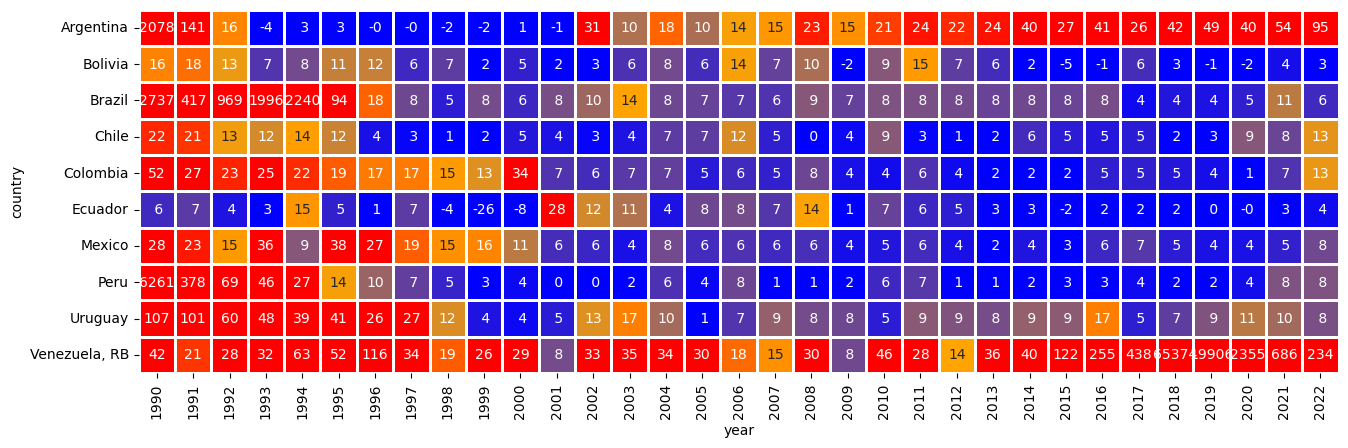

In [2]:
#Dates
start = datetime(1990, 1, 1)
end = datetime(2023, 12, 31)

#Variable to download data
variable = 'NY.GDP.DEFL.KD.ZG' #GDP deflator
description = 'GDP deflator'

#Create Dataframe
indicator_df = wb.download(indicator = variable, start=start,end=end,country=['BR','CO','MX','CL','PE','AR','BO','EC','UY','VE'] )
indicator_df.reset_index(inplace=True)

#Organize data
df_TOTAL = indicator_df[['country','year',variable]]
df_TOTAL.rename(columns={variable: description},inplace=True)
df_TOTAL = df_TOTAL.pivot('country','year',description)
df_TOTAL.reset_index(inplace=True)

#Add Venezuela data from 2016
df_TOTAL['2015'].iloc[9] = 121.738
df_TOTAL['2016'].iloc[9] = 254.949
df_TOTAL['2017'].iloc[9] = 438.117
df_TOTAL['2018'].iloc[9] = 65374
df_TOTAL['2019'].iloc[9] = 19906
df_TOTAL['2020'].iloc[9] = 2355
df_TOTAL['2021'].iloc[9] = 686.4

#Add data for 2022 for all the countries
df_TOTAL[2022] = pd.Series([94.8,3.1,5.79,12.8,13.12,3.74,7.82,8.46,8.29,234], index=[0,1,2,3,4,5,6,7,8,9])
df_TOTAL.set_index('country',inplace=True)

#Create cmap for heatmap
cmap=LinearSegmentedColormap.from_list('br',["b", "orange", "r"], N=256) 

#Create plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.heatmap(vmin=3.0,vmax=25.0,data = df_TOTAL, annot = True, fmt='2.0f',cmap = cmap,annot_kws={'size':10},cbar=False, square=True,linewidth=0.75)
plt.subplots_adjust(bottom=0.1, right=2.0, top=2.0)